In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer


In [2]:
#Import data
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Finding data type
df.drop('customerID', axis= 'columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#Converting Totalcharges into float
TotalCharges= df['TotalCharges']
TotalCharges.head(5)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
#Checking rows and columns
df[pd.to_numeric(df.Churn,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.shape

(7043, 20)

In [9]:
#Identify space in column totalcharges
df.iloc[488]['TotalCharges']

' '

In [10]:
#Removing unwanted features in totalcharges column
df1 = df[df.TotalCharges!=' ']
df1.shape
         

(7032, 20)

In [18]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges )

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
#Converted object to float
df1.TotalCharges.dtypes

dtype('float64')

In [14]:
df.Dependents

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

. Demographic: 
a. Which 2 demographics have proven to be the most popular with the telco brand?

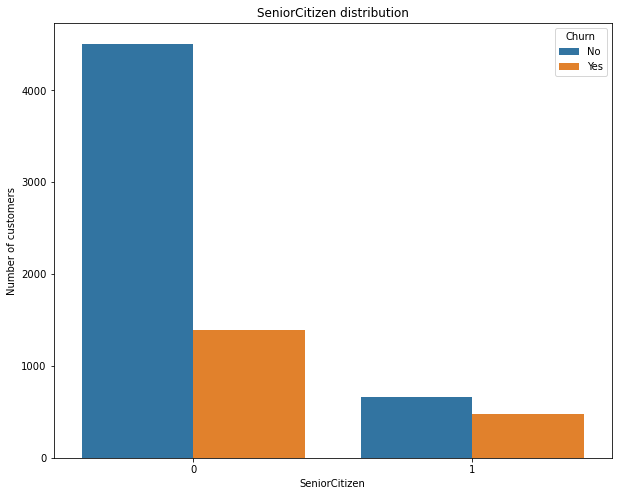

In [15]:
#SeniorCitizen
plt.figure(figsize=[10,8])
ax = sns.countplot(x=df['SeniorCitizen'], hue = df['Churn'], data = df)
ax.set_ylabel('Number of customers')
ax.set_xlabel('SeniorCitizen')
ax.set_title('SeniorCitizen distribution')
plt.show()

In [16]:
The number of Seniorcitizen churning are few around 1,500 compared to over 5,000 customers not churning.This Seniorcitizen are popular with the telco brand.

SyntaxError: invalid syntax (<ipython-input-16-f4ac8d91f9f9>, line 1)

No handles with labels found to put in legend.


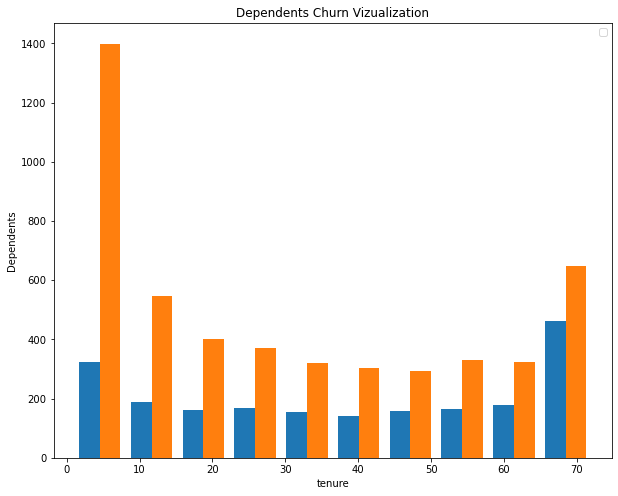

In [65]:
plt.figure(figsize=[10,8])
tenure_Dependents_no = df1[df1.Dependents=='No'].tenure
tenure_Dependents_yes = df1[df1.Dependents=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Dependents')
plt.title('Dependents Churn Vizualization')
plt.hist([tenure_Dependents_yes, tenure_Dependents_no ])
plt.legend()

AttributeError: 'Rectangle' object has no property 'colour'

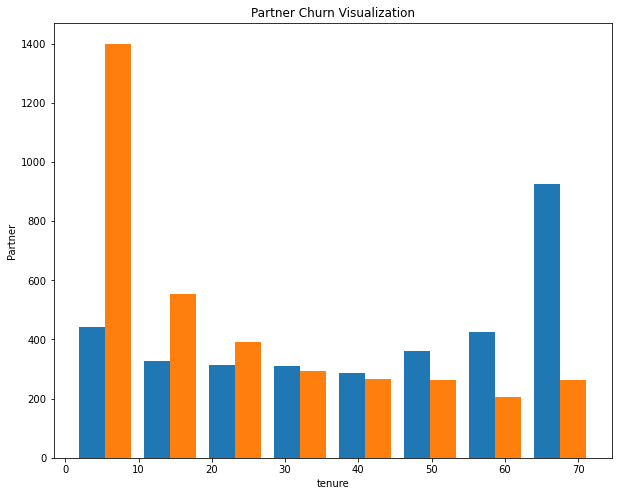

In [64]:
plt.figure(figsize=[10,8])
tenure_Partner_no = df1[df1.Partner=='No'].tenure
tenure_Partner_yes = df1[df1.Partner=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Partner')
plt.title('Partner Churn Visualization')
plt.hist([tenure_Partner_yes,tenure_Partner_no], colour=['blue','red'],label=['Churn=Yes','Churn=No'],bins=8,)
plt.legend()

b. If  the  marketing  team  wanted  to  increase  customer  retention,  to  whom  should 
they target their advertisements to?

The chart showing partner churn visualization shows majority of customers who have partners  over 1,2000 with tenure less than ten months have a higher churning rate.
It also shows a number of customers who have partners over 1,000 with tenure more than 70 months are churning less.
The chart showing dependents churn vizualizatio shows number of dependents churning is high at 0-10 months and the number decreases with time,the number of customers  with dependents are not churning after a long tenure of 70 months is relatively lower to 600 dependants as compared to 1,400 dependents at the beginning.
If the marketing team want to retain customers they should target the customer with partners and dependents this is because both of them have higher churning rate at initial tenure of less than 10 months.

2. Services:  
a. Which  3  services  are  contributing  to  a  higher  monthly  charge  and  resulting  to 
customers churning? (Use visualizations in explaining your analysis) 

In [ ]:
df.head(5)

In [ ]:
df.info

In [24]:
#getting specif columns
df.loc[0:5,'PhoneService':'MonthlyCharges',]

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65


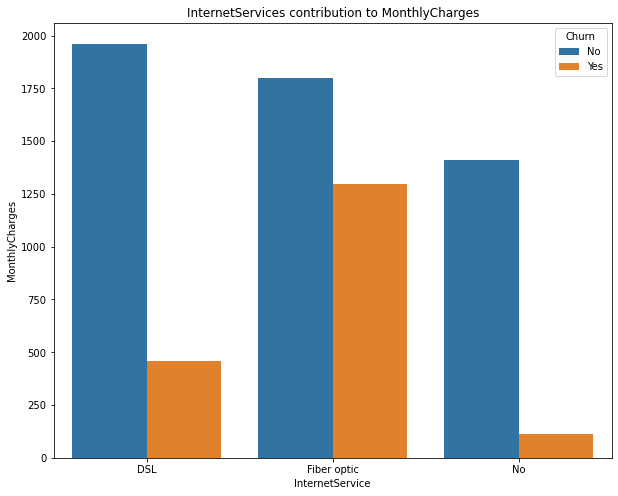

In [66]:
#Internetservices contribution
plt.figure(figsize=[10,8])
ax = sns.countplot(x=df['InternetService'], hue = df['Churn'], data = df)
ax.set_ylabel('MonthlyCharges')
ax.set_xlabel('InternetService')
ax.set_title('InternetServices contribution to MonthlyCharges')
plt.show()

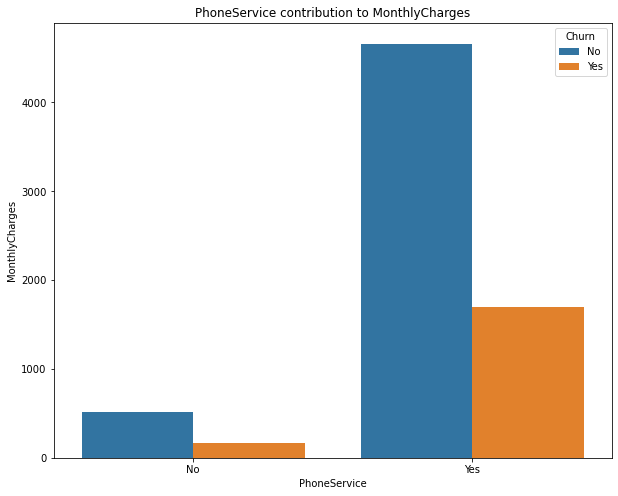

In [67]:
#Phone service contribution
plt.figure(figsize=[10,8])
ax = sns.countplot(x=df['PhoneService'], hue = df['Churn'], data = df)
ax.set_ylabel('MonthlyCharges')
ax.set_xlabel('PhoneService')
ax.set_title('PhoneService contribution to MonthlyCharges')
plt.show()

Customers using fibre optic are contributing to higher income and also higher churn rate.
Customers who are using more phone service are contributing to higher montly income and also have higher chances of churning.

In [62]:
df['Additional Services'] =(df[['OnlineBackup','OnlineSecurity','DeviceProtection',
                                'StreamingTV','StreamingMovies']]=='yes').sum(axis=1)


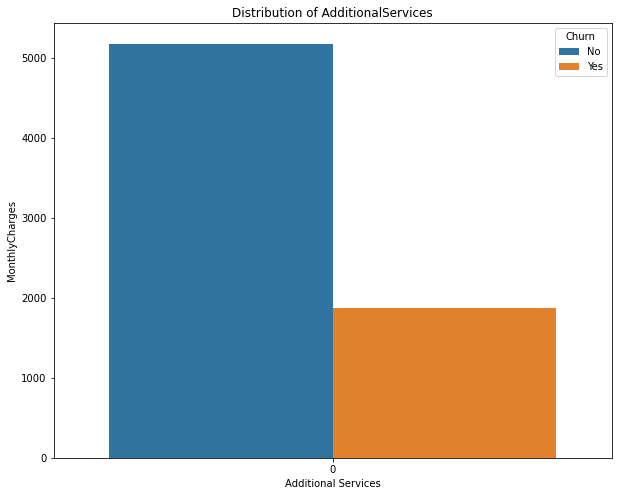

In [63]:
plt.figure(figsize=[10,8])
ax = sns.countplot(x=df['Additional Services'], hue = df['Churn'], data = df)
ax.set_ylabel('MonthlyCharges')
ax.set_xlabel('Additional Services')
ax.set_title('Distribution of AdditionalServices' )
plt.show()

In [61]:
Other additional services are contributing to higher monthly charges and the churn rate is low.

SyntaxError: invalid syntax (<ipython-input-61-1eaf9dfd2e0b>, line 1)

b. If  the  telco  was  to  offer  Phone  as  a  standalone  service,  which  type  of  contract 
would encourage customer retention?

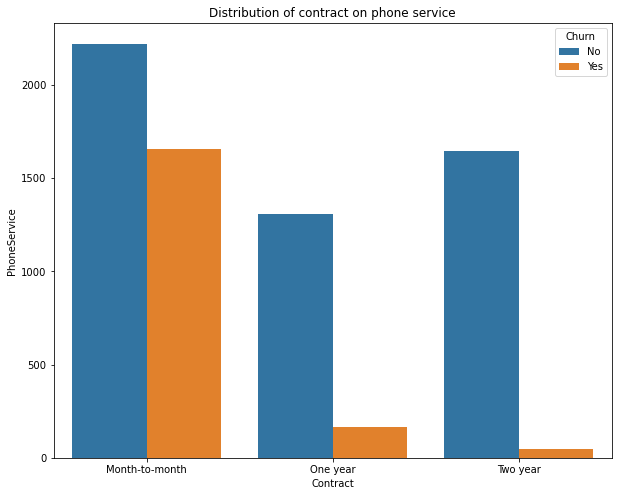

In [58]:
#Contract that would encourage retention
plt.figure(figsize=[10,8])
ax = sns.countplot(x=df['Contract'], hue = df['Churn'], data = df)
ax.set_ylabel('PhoneService')
ax.set_xlabel('Contract')
ax.set_title('Distribution of contract on phone service' )
plt.show()

Month to month contract encourage higher churning on phone services.
Customers with contract for longer period Two year contract on phone services are churning very minimal.
Thus i would encourage long term contracts from two year followed by one year contract

3. Payment: (Use visualizations in explaining your analysis) 
a. If  the  company  was  to  streamline  all  its  services  into  3  bouquet packages,  what 
monthly prices will be appropriate for the following packages to keep customers 
from churning: 
i. Basic 
ii. Plus 
iii. Premium 

In [55]:
#Payments
df.PaymentMethod

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7043, dtype: object

In [57]:
payment = {'Electronic check:'Electronic check','Mailed check':'Mailed check','Bank transfer (automatic)'
           :'Credit card (automatic)'}
df['PaymentMethod'].replace(payment,inplace=True)


SyntaxError: invalid syntax (<ipython-input-57-c4ff40589116>, line 1)

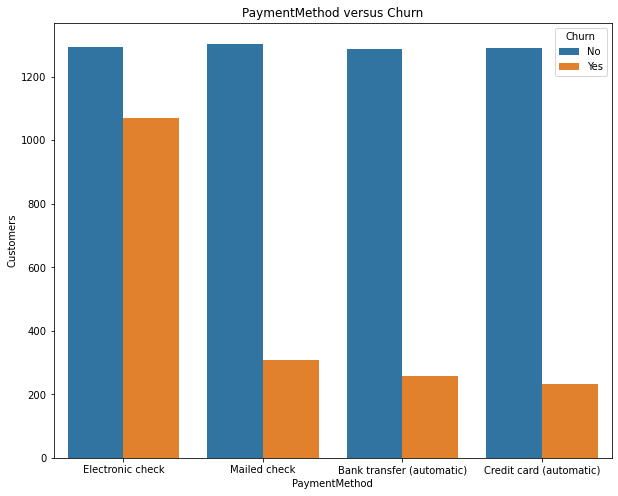

In [51]:
plt.figure(figsize=[10,8])
ax = sns.countplot(x=df['PaymentMethod'], hue = df['Churn'], data = df)
ax.set_ylabel('Customers')
ax.set_xlabel('PaymentMethod')
ax.set_title('Payment Method versus Churn' )
plt.show()

In [46]:
df1.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [50]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
df1_num = df1[numerical]
df1_num.describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The monthly prices will be;

Basic 35.587500

Premium 70.35000

Plus    89.862500

b. Should the company strictly go paperless for their monthly billings as a technique 
of keeping their customers and why? 

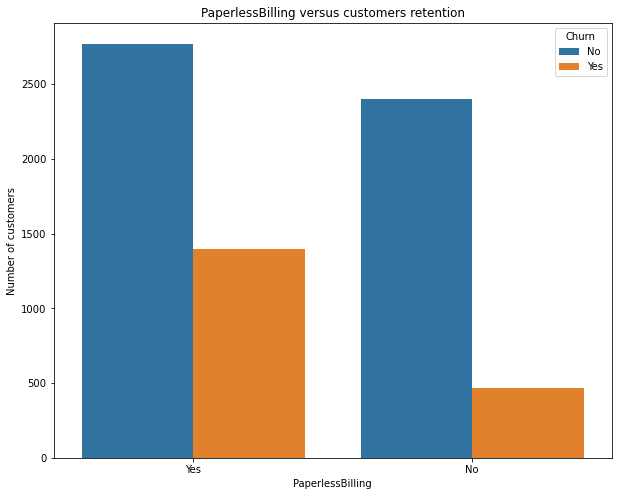

In [68]:
plt.figure(figsize=[10,8])
ax = sns.countplot(x=df['PaperlessBilling'], hue = df['Churn'], data = df)
ax.set_ylabel('Number of customers')
ax.set_xlabel('PaperlessBilling')
ax.set_title('PaperlessBilling versus customers retention' )
plt.show()

Customers using paperlessbilling have lower churn rate than customers using pater.Thus i would enciurage the company to go paperless.